#                                          <center>EXPERIMENT-1</center>

# Q1. Write a program to implement Breadth First Search using python.


In [1]:
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

visited = [] # List for visited nodes.
queue = []     #Initialize a queue

def bfs(visited, graph, node): #function for BFS
  visited.append(node)
  queue.append(node)

  while queue:          # Creating loop to visit each node
    m = queue.pop(0) 
    print (m, end = " ") 

    for neighbour in graph[m]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

# Driver Code
print("Following is the Breadth-First Search")
bfs(visited, graph, '5')    # function calling


Following is the Breadth-First Search
5 3 7 2 4 8 

#                                          <center>EXPERIMENT-2</center>

# Q2. Write a program to implement Depth First Search using python.


In [2]:
# Using a Python dictionary to act as an adjacency list
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
   
}

visited = set() # Set to keep track of visited nodes of graph.

def dfs(visited, graph, node):  #function for dfs 
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

# Driver Code
print("Following is the Depth-First Search")
dfs(visited, graph, '5')


Following is the Depth-First Search
5
3
2
4
8
7


#                                          <center>EXPERIMENT-3</center>

# Q3.Write a program to implement hill climbing using python.


In [3]:
import random

def randomSolution(tsp):
    cities = list(range(len(tsp)))
    solution = []

    for i in range(len(tsp)):
        randomCity = cities[random.randint(0, len(cities) - 1)]
        solution.append(randomCity)
        cities.remove(randomCity)

    return solution

def routeLength(tsp, solution):
    routeLength = 0
    for i in range(len(solution)):
        routeLength += tsp[solution[i - 1]][solution[i]]
    return routeLength

def getNeighbours(solution):
    neighbours = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbour = solution.copy()
            neighbour[i] = solution[j]
            neighbour[j] = solution[i]
            neighbours.append(neighbour)
    return neighbours

def getBestNeighbour(tsp, neighbours):
    bestRouteLength = routeLength(tsp, neighbours[0])
    bestNeighbour = neighbours[0]
    for neighbour in neighbours:
        currentRouteLength = routeLength(tsp, neighbour)
        if currentRouteLength < bestRouteLength:
            bestRouteLength = currentRouteLength
            bestNeighbour = neighbour
    return bestNeighbour, bestRouteLength

def hillClimbing(tsp):
    currentSolution = randomSolution(tsp)
    currentRouteLength = routeLength(tsp, currentSolution)
    neighbours = getNeighbours(currentSolution)
    bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tsp, neighbours)

    while bestNeighbourRouteLength < currentRouteLength:
        currentSolution = bestNeighbour
        currentRouteLength = bestNeighbourRouteLength
        neighbours = getNeighbours(currentSolution)
        bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tsp, neighbours)

    return currentSolution, currentRouteLength

def main():
    tsp = [
        [0, 400, 500, 300],
        [400, 0, 300, 500],
        [500, 300, 0, 400],
        [300, 500, 400, 0]
    ]

    print(hillClimbing(tsp))

if __name__ == "__main__":
    main()


([0, 3, 2, 1], 1400)


#                                          <center>EXPERIMENT-4</center>

# Q4.Write a program to implement A* using python.


In [4]:
from collections import deque

class Graph:

    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def get_neighbors(self, v):
        return self.adjacency_list[v]

    def h(self, n):
        H = {
            'A': 1,
            'B': 1,
            'C': 1,
            'D': 1
        }

        return H[n]

    def a_star_algorithm(self, start_node, stop_node):
        open_list = set([start_node])
        closed_list = set([])

        g = {}

        g[start_node] = 0

        parents = {}
        parents[start_node] = start_node

        while len(open_list) > 0:
            n = None

            for v in open_list:
                if n == None or g[v] + self.h(v) < g[n] + self.h(n):
                    n = v;

            if n == None:
                print('Path does not exist!')
                return None

        
            if n == stop_node:
                reconst_path = []

                while parents[n] != n:
                    reconst_path.append(n)
                    n = parents[n]

                reconst_path.append(start_node)

                reconst_path.reverse()

                print('Path found: {}'.format(reconst_path))
                return reconst_path

            for (m, weight) in self.get_neighbors(n):
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight

                
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n

                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)

           
            open_list.remove(n)
            closed_list.add(n)

        print('Path does not exist!')
        return None
    
adjacency_list = {
    'A': [('B', 1), ('C', 3), ('D', 7)],
    'B': [('D', 5)],
    'C': [('D', 12)]
}
graph1 = Graph(adjacency_list)
graph1.a_star_algorithm('A', 'D')    

Path found: ['A', 'B', 'D']


['A', 'B', 'D']

#                                          <center>EXPERIMENT-5</center>

# Q5.Write a program to implement Best first search using python.


In [5]:
from queue import PriorityQueue

# Filling adjacency matrix with empty arrays
vertices = 14
graph = [[] for i in range(vertices)]


# Function for adding edges to graph
def add_edge(x, y, cost):
    graph[x].append((y, cost))
    graph[y].append((x, cost))


# Function For Implementing Best First Search
# Gives output path having the lowest cost
def best_first_search(source, target, vertices):
    visited = [0] * vertices
    pq = PriorityQueue()
    pq.put((0, source))
    print("Path: ")
    while not pq.empty():
        u = pq.get()[1]
        # Displaying the path having the lowest cost
        print(u, end=" ")
        if u == target:
            break

        for v, c in graph[u]:
            if not visited[v]:
                visited[v] = True
                pq.put((c, v))
    print()


if __name__ == '__main__':
    # The nodes shown in above example(by alphabets) are
    # implemented using integers add_edge(x,y,cost);
    add_edge(0, 1, 1)
    add_edge(0, 2, 8)
    add_edge(1, 2, 12)
    add_edge(1, 4, 13)
    add_edge(2, 3, 6)
    add_edge(4, 3, 3)

    source = 0
    target = 2
    best_first_search(source, target, vertices)


Path: 
0 1 0 2 


#                                          <center>EXPERIMENT-6</center>

# Q6.Write a program to solve travelling salesman problem using python.


In [6]:
from sys import maxsize
from itertools import permutations
V = 4

# implementation of traveling Salesman Problem
def travellingSalesmanProblem(graph, s):

	# store all vertex apart from source vertex
	vertex = []
	for i in range(V):
		if i != s:
			vertex.append(i)

	# store minimum weight Hamiltonian Cycle
	min_path = maxsize
	next_permutation=permutations(vertex)
	for i in next_permutation:

		# store current Path weight(cost)
		current_pathweight = 0

		# compute current path weight
		k = s
		for j in i:
			current_pathweight += graph[k][j]
			k = j
		current_pathweight += graph[k][s]

		# update minimum
		min_path = min(min_path, current_pathweight)
		
	return min_path


# Driver Code
if __name__ == "__main__":

	# matrix representation of graph
	graph = [[0, 10, 15, 20], [10, 0, 35, 25],
			[15, 35, 0, 30], [20, 25, 30, 0]]
	s = 0
	print(travellingSalesmanProblem(graph, s))


80


#                                          <center>EXPERIMENT-7</center>

# Q7.Write a program to solve 8 queen problem.


In [7]:
# Taking number of queens as input from user
print ("Enter the number of queens")
N = int(input())
# here we create a chessboard
# NxN matrix with all elements set to 0
board = [[0]*N for _ in range(N)]
def attack(i, j):
    #checking vertically and horizontally
    for k in range(0,N):
        if board[i][k]==1 or board[k][j]==1:
            return True
    #checking diagonally
    for k in range(0,N):
        for l in range(0,N):
            if (k+l==i+j) or (k-l==i-j):
                if board[k][l]==1:
                    return True
    return False
def N_queens(n):
    if n==0:
        return True
    for i in range(0,N):
        for j in range(0,N):
            if (not(attack(i,j))) and (board[i][j]!=1):
                board[i][j] = 1
                if N_queens(n-1)==True:
                    return True
                board[i][j] = 0
    return False
N_queens(N)
for i in board:
    print (i)


Enter the number of queens
5
[1, 0, 0, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 0, 0, 1]
[0, 1, 0, 0, 0]
[0, 0, 0, 1, 0]


#                                          <center>EXPERIMENT-8</center>

# Q8.Write a program to implement Bayesian Network

In [8]:
!pip install pgmpy

In [9]:
import pandas as pd
from urllib.request import urlopen
from pgmpy.models import BayesianModel

names="A,B,C,D,E,F,G,H,I,J,K,L,M,RESULT"
names=names.split(",")
# len(names)

data=pd.read_csv(urlopen("http://bit.do/heart-disease"),names=names)
# data.head()

model=BayesianModel([("A","B"),("B","C"),("C","RESULT")])
model.fit(data)

from pgmpy.inference import VariableElimination
infer=VariableElimination(model)
q=infer.query(variables=["RESULT"],evidence={"A":22})

print(q)

/Users/chetnagupta/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/chetnagupta/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"
Eliminating: C: 100%|███████████████████████████| 2/2 [00:00<00:00, 1332.37it/s]

+-----------+---------------+
| RESULT    |   phi(RESULT) |
+===========+===============+
| RESULT(0) |        0.5387 |
+-----------+---------------+
| RESULT(1) |        0.1824 |
+-----------+---------------+
| RESULT(2) |        0.1196 |
+-----------+---------------+
| RESULT(3) |        0.1161 |
+-----------+---------------+
| RESULT(4) |        0.0433 |
+-----------+---------------+


# <center>EXPERIMENT-9</center>

# Q9.Write a program to implement Linear and Logistic regression.


LINEAR REGRESSION

Estimated coefficients:
b_0 = 1.2363636363636363 		
b_1 = 1.1696969696969697


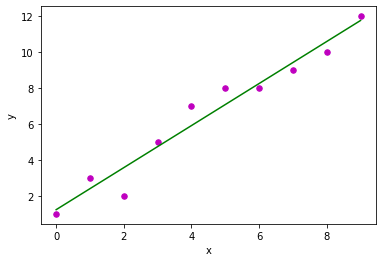

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def plot_regression_line(x, y, b):
	# plotting the actual points as scatter plot
	plt.scatter(x, y, color = "m",
			marker = "o", s = 30)

	# predicted response vector
	y_pred = b[0] + b[1]*x

	# plotting the regression line
	plt.plot(x, y_pred, color = "g")

	# putting labels
	plt.xlabel('x')
	plt.ylabel('y')

	# function to show plot
	plt.show()

def main():
	# observations / data
	x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
	y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

	# estimating coefficients
	b = estimate_coef(x, y)
	print("Estimated coefficients:\nb_0 = {} \
		\nb_1 = {}".format(b[0], b[1]))

	# plotting regression line
	plot_regression_line(x, y, b)

if __name__ == "__main__":
	main()


LOGISTIC REGRESSION

/Users/chetnagupta/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

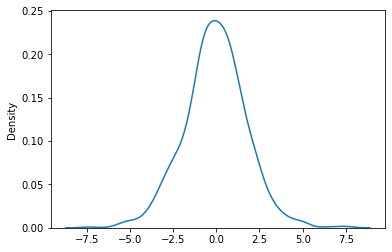

In [11]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.logistic(size=1000),hist=False)

plt.show

#                                          <center>EXPERIMENT-10</center>

# Q10.Write a program to implement Tic-Tac-Toe using python.


In [12]:
# Tic-Tac-Toe Program using
# random number in Python

# importing all necessary libraries
import numpy as np
import random
from time import sleep

# Creates an empty board
def create_board():
	return(np.array([[0, 0, 0],
					[0, 0, 0],
					[0, 0, 0]]))

# Check for empty places on board
def possibilities(board):
	l = []
	
	for i in range(len(board)):
		for j in range(len(board)):
			
			if board[i][j] == 0:
				l.append((i, j))
	return(l)

# Select a random place for the player
def random_place(board, player):
	selection = possibilities(board)
	current_loc = random.choice(selection)
	board[current_loc] = player
	return(board)

# Checks whether the player has three
# of their marks in a horizontal row
def row_win(board, player):
	for x in range(len(board)):
		win = True
		
		for y in range(len(board)):
			if board[x, y] != player:
				win = False
				continue
				
		if win == True:
			return(win)
	return(win)

# Checks whether the player has three
# of their marks in a vertical row
def col_win(board, player):
	for x in range(len(board)):
		win = True
		
		for y in range(len(board)):
			if board[y][x] != player:
				win = False
				continue
				
		if win == True:
			return(win)
	return(win)

# Checks whether the player has three
# of their marks in a diagonal row
def diag_win(board, player):
	win = True
	y = 0
	for x in range(len(board)):
		if board[x, x] != player:
			win = False
	if win:
		return win
	win = True
	if win:
		for x in range(len(board)):
			y = len(board) - 1 - x
			if board[x, y] != player:
				win = False
	return win

# Evaluates whether there is
# a winner or a tie
def evaluate(board):
	winner = 0
	
	for player in [1, 2]:
		if (row_win(board, player) or
			col_win(board,player) or
			diag_win(board,player)):
				
			winner = player
			
	if np.all(board != 0) and winner == 0:
		winner = -1
	return winner

# Main function to start the game
def play_game():
	board, winner, counter = create_board(), 0, 1
	print(board)
	sleep(2)
	
	while winner == 0:
		for player in [1, 2]:
			board = random_place(board, player)
			print("Board after " + str(counter) + " move")
			print(board)
			sleep(2)
			counter += 1
			winner = evaluate(board)
			if winner != 0:
				break
	return(winner)

# Driver Code
print("Winner is: " + str(play_game()))


[[0 0 0]
 [0 0 0]
 [0 0 0]]
Board after 1 move
[[0 1 0]
 [0 0 0]
 [0 0 0]]
Board after 2 move
[[2 1 0]
 [0 0 0]
 [0 0 0]]
Board after 3 move
[[2 1 0]
 [0 0 0]
 [1 0 0]]
Board after 4 move
[[2 1 0]
 [0 0 2]
 [1 0 0]]
Board after 5 move
[[2 1 0]
 [0 1 2]
 [1 0 0]]
Board after 6 move
[[2 1 0]
 [0 1 2]
 [1 0 2]]
Board after 7 move
[[2 1 0]
 [1 1 2]
 [1 0 2]]
Board after 8 move
[[2 1 2]
 [1 1 2]
 [1 0 2]]
Winner is: 2
